In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve
import scikitplot as skplt
import pickle
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ACS.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

matrix of dimensions 4177x9

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


shape row count == non null count (no null vaues present)

In [5]:
#encoding the sex column to int64 Dtype this will convert the data into continuous data
lab_enc=LabelEncoder()
data=lab_enc.fit_transform(df['Sex'])
df['Sex']=data
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<AxesSubplot:>

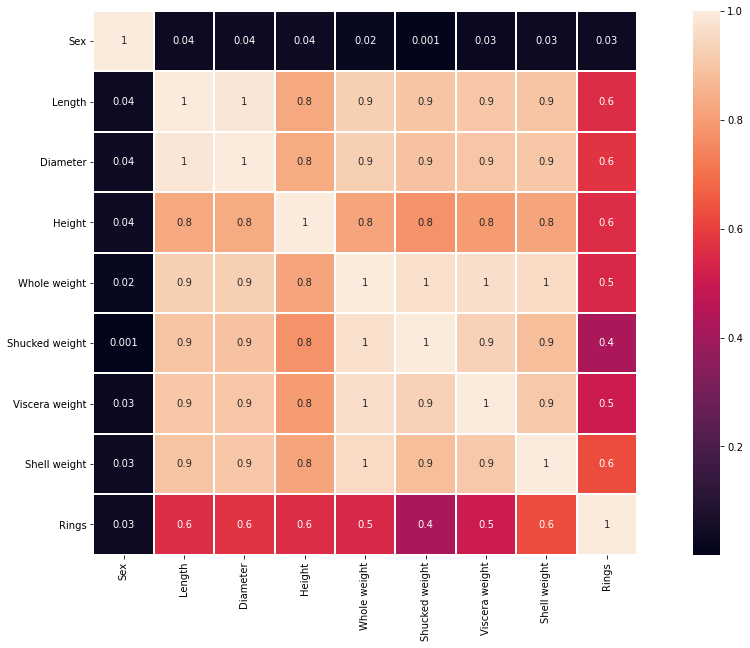

In [6]:
df_corr=df.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True,square=True,fmt='.1g',linewidth=1)

- This plot show the existence of multi collinearity in the dataset. We will have to drop some columns

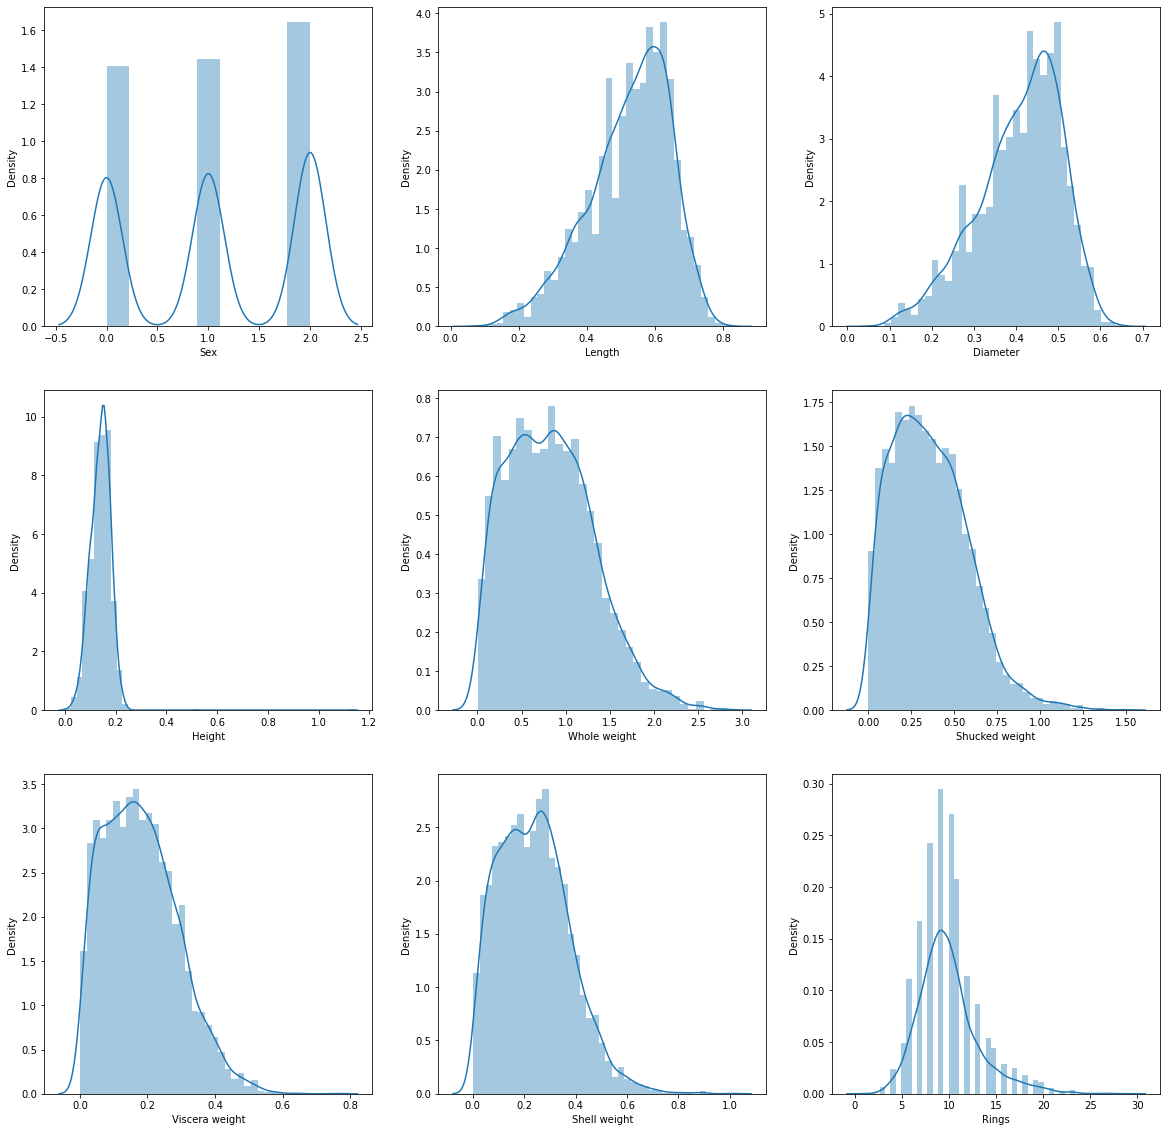

In [7]:
#Distribution of the df
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

- There is some skew in our data

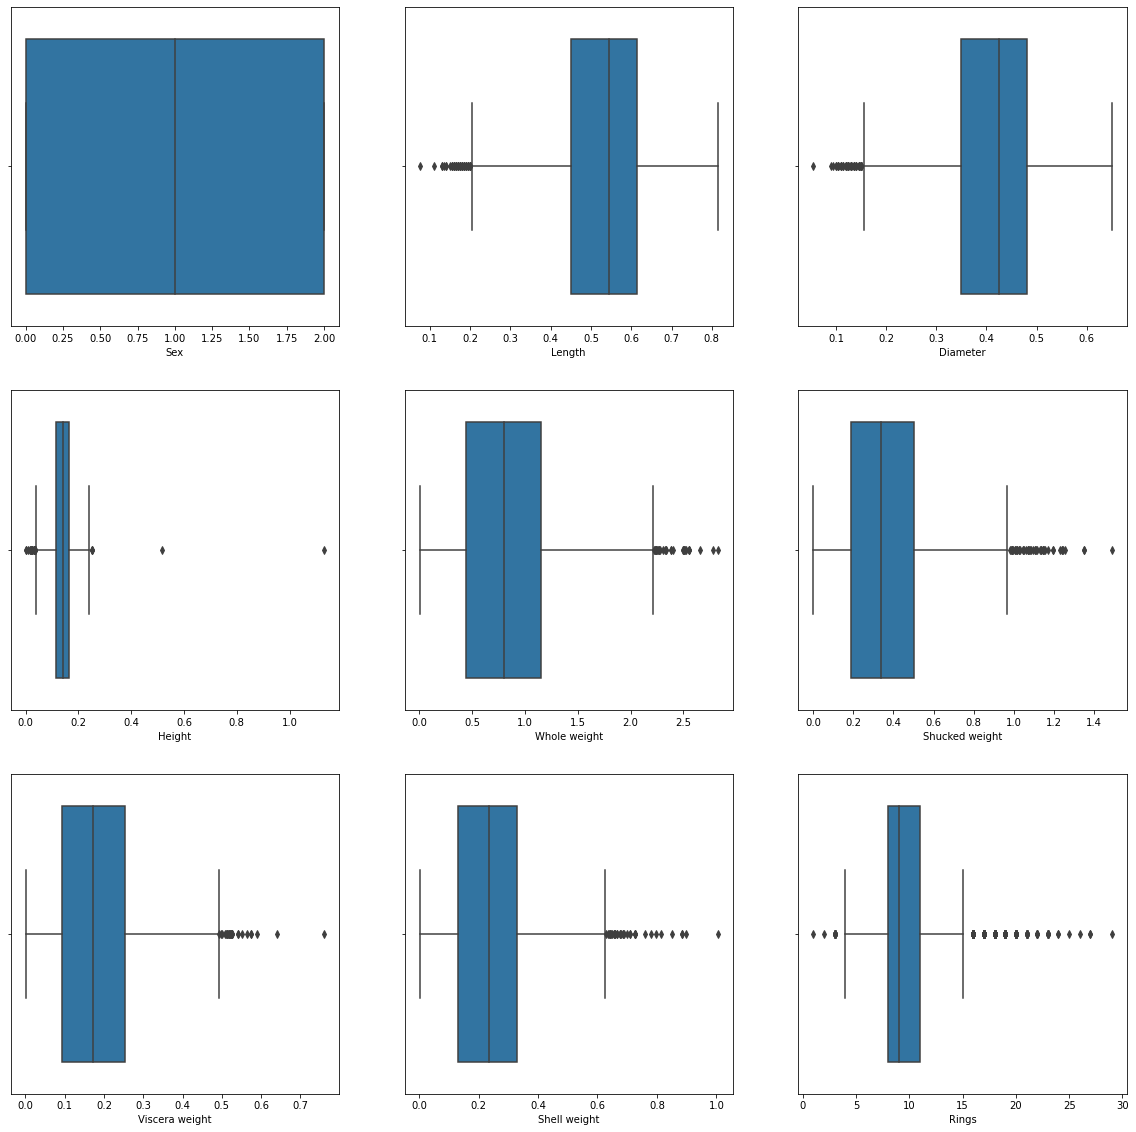

In [8]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

- Detected many outliers in feature columns

In [9]:
#Removing outliers using zscore
z=np.abs(stats.zscore(df))
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [10]:
index=(np.where(z>3)[0])
df=df.drop(df.index[index])

In [11]:
df.shape

(4027, 9)

 - 4177 - 4027 = 150 rows dropped

In [12]:
df.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [13]:
x=df.drop(columns=['Rings'],axis=1)
y=df['Rings']

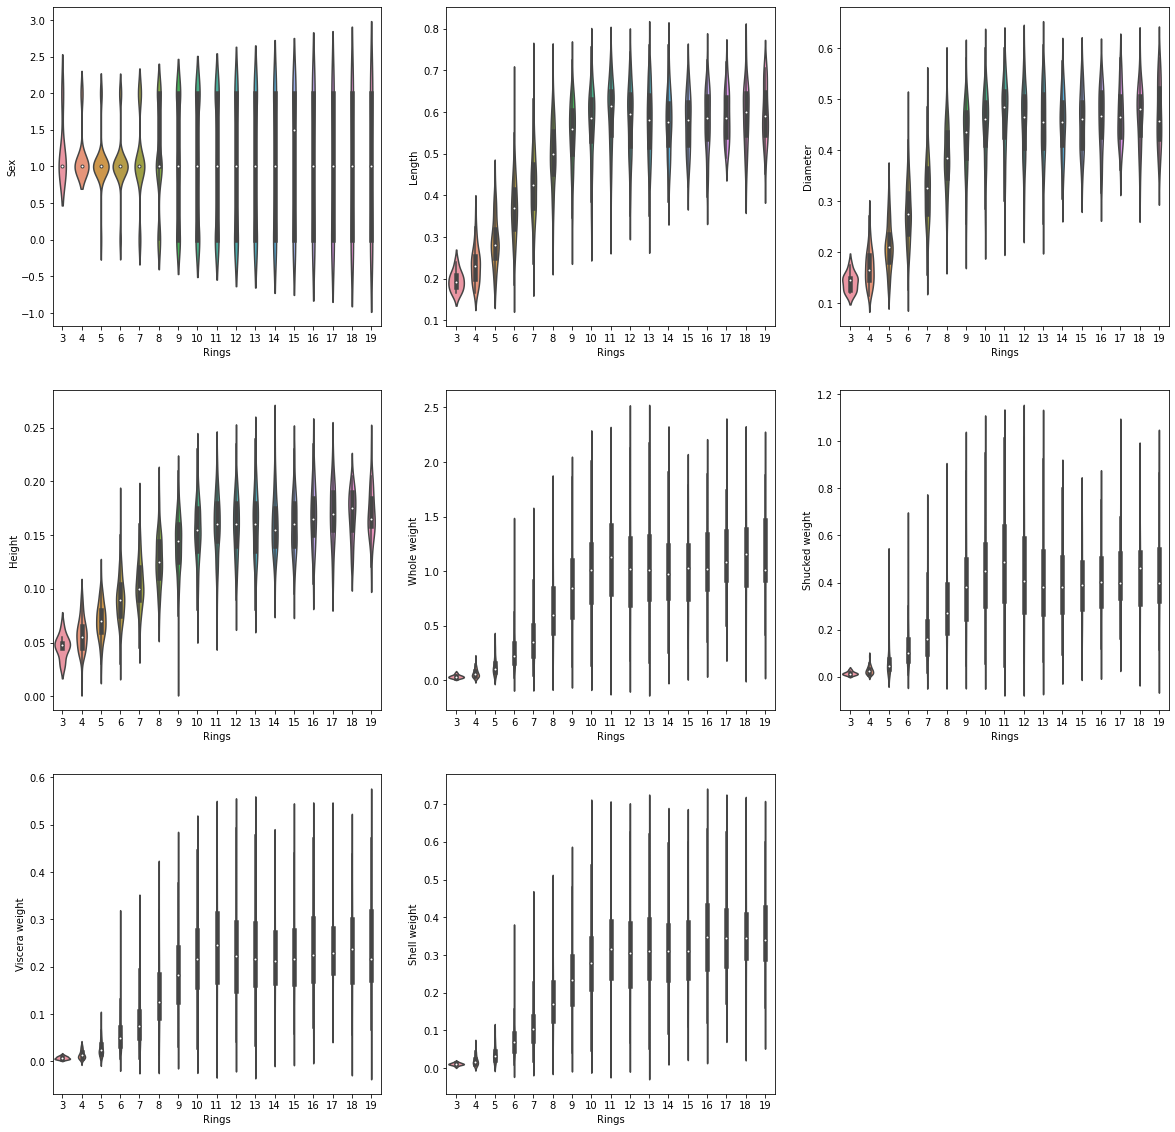

In [14]:
# Relation between features and labels using violin plot
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.violinplot(y,x[column])
    plotnumber+=1

 - features and labels are linearly independent

In [15]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(x)

In [16]:
data_new=pd.DataFrame(data_new,columns=x.columns)
data_new.skew()

Sex              -0.174523
Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
dtype: float64

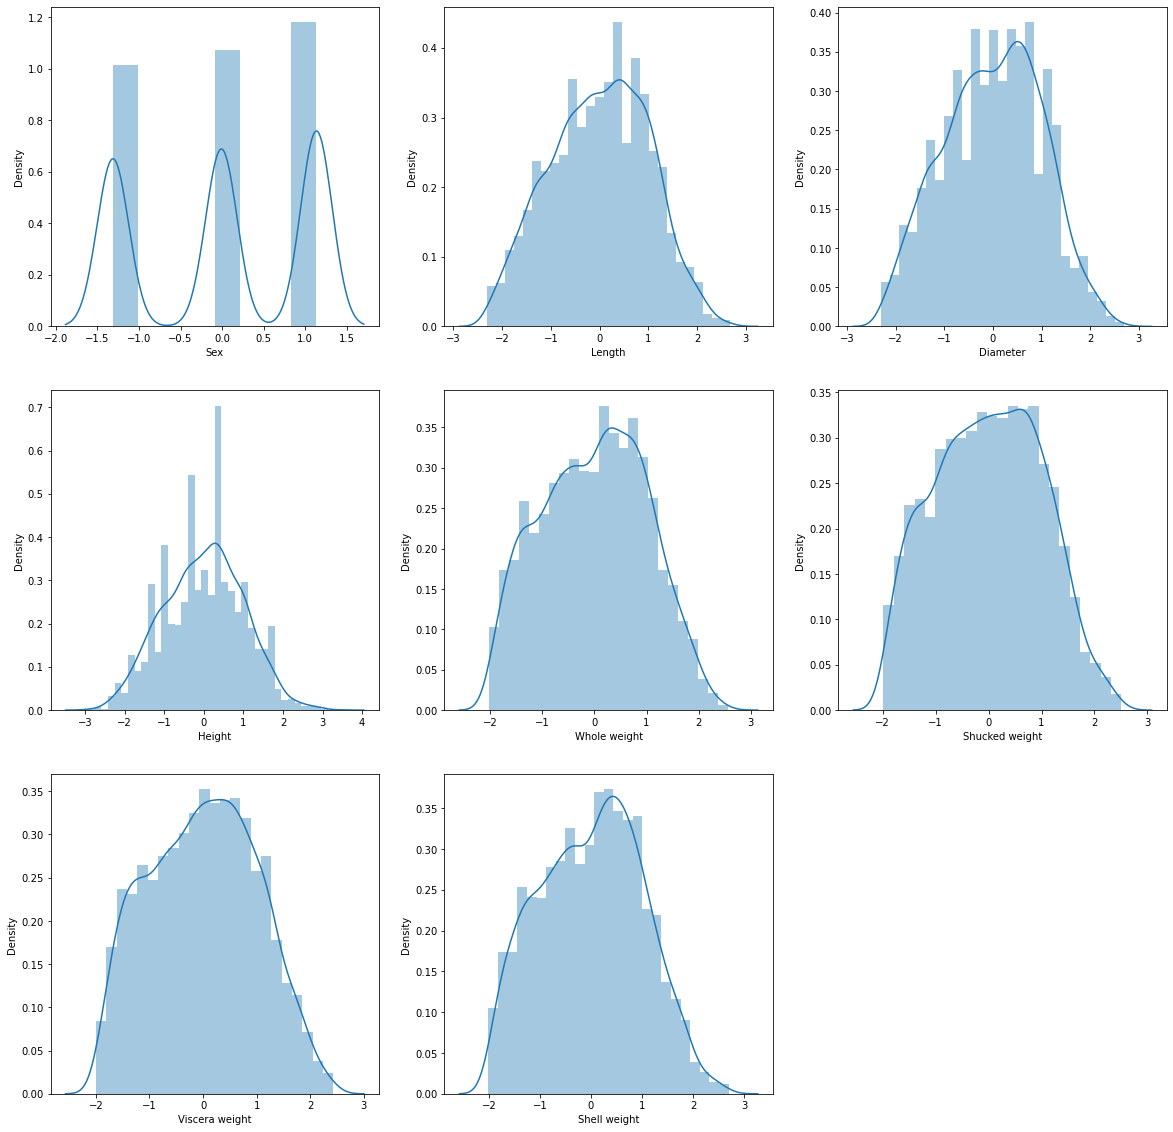

In [17]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

In [18]:
x = data_new
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [66]:
#Classifiers :
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC(probability=True)

In [64]:
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
svm.fit(x_train,y_train)
print("Done")

Done


In [22]:
# Training results of KNN
y_pred=knn.predict(x_train)
print('Accuracy Score of KNN :',accuracy_score(y_train,y_pred)*100)

Accuracy Score of KNN : 44.7682119205298


In [23]:
pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,accuracy,macro avg,weighted avg
precision,0.4,0.488889,0.521739,0.458498,0.448649,0.482625,0.429652,0.420523,0.462783,0.380952,0.372340,0.400000,0.583333,0.769231,0.400000,0.0,0.500000,0.447682,0.442307,0.445311
recall,0.4,0.550000,0.521739,0.588832,0.555184,0.576037,0.557957,0.458333,0.410920,0.216216,0.224359,0.071429,0.194444,0.204082,0.150000,0.0,0.041667,0.447682,0.336541,0.447682
f1-score,0.4,0.517647,0.521739,0.515556,0.496263,0.525210,0.485470,0.438615,0.435312,0.275862,0.280000,0.121212,0.291667,0.322581,0.218182,0.0,0.076923,0.447682,0.348367,0.430289
support,5.0,40.000000,92.000000,197.000000,299.000000,434.000000,509.000000,456.000000,348.000000,185.000000,156.000000,84.000000,72.000000,49.000000,40.000000,30.0,24.000000,0.447682,3020.000000,3020.000000


In [24]:
pd.DataFrame(confusion_matrix(y_train,y_pred))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,22,10,7,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,11,48,21,9,1,0,1,0,0,0,0,0,0,0,0,0
3,0,6,21,116,40,10,0,1,3,0,0,0,0,0,0,0,0
4,1,2,7,53,166,38,21,7,2,1,1,0,0,0,0,0,0
5,0,0,4,24,66,250,41,31,8,4,6,0,0,0,0,0,0
6,0,0,1,16,39,73,284,54,26,9,5,1,1,0,0,0,0
7,0,1,1,5,20,42,114,209,38,12,10,0,2,2,0,0,0
8,0,0,0,3,9,42,68,63,143,12,5,1,0,0,2,0,0
9,0,0,0,1,10,13,48,37,27,40,6,0,1,1,1,0,0


In [25]:
#Testing results from KNN
y_pred=knn.predict(x_test)
knn_te_report=accuracy_score(y_test,y_pred)*100
print(f'Accuracy Score:',accuracy_score(y_test,y_pred)*100)

Accuracy Score: 20.25819265143992


In [26]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,accuracy,macro avg,weighted avg
precision,0.0,0.250000,0.160000,0.222222,0.175000,0.216749,0.230769,0.203488,0.205607,0.137931,0.105263,0.100000,0.0,0.250000,0.142857,0.0,0.0,0.202582,0.141170,0.185545
recall,0.0,0.444444,0.190476,0.229508,0.228261,0.333333,0.288136,0.207101,0.177419,0.060606,0.046512,0.028571,0.0,0.076923,0.076923,0.0,0.0,0.202582,0.140483,0.202582
f1-score,0.0,0.320000,0.173913,0.225806,0.198113,0.262687,0.256281,0.205279,0.190476,0.084211,0.064516,0.044444,0.0,0.117647,0.100000,0.0,0.0,0.202582,0.131963,0.188279
support,5.0,9.000000,21.000000,61.000000,92.000000,132.000000,177.000000,169.000000,124.000000,66.000000,43.000000,35.000000,30.0,13.000000,13.000000,9.0,8.0,0.202582,1007.000000,1007.000000


In [27]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,4,4,4,8,0,1,0,0,0,0,0,0,0,0,0,0
3,0,3,10,14,28,5,1,0,0,0,0,0,0,0,0,0,0
4,0,1,3,24,21,32,7,3,1,0,0,0,0,0,0,0,0
5,0,0,2,13,25,44,27,14,5,1,0,0,1,0,0,0,0
6,0,0,1,3,17,49,51,29,17,7,3,0,0,0,0,0,0
7,0,0,0,0,11,32,54,35,25,4,1,3,3,1,0,0,0
8,0,0,0,1,4,20,36,33,22,2,2,1,1,1,0,1,0
9,0,0,0,1,4,7,20,18,8,4,2,2,0,0,0,0,0


In [28]:
# Training results of DTC
y_pred=dt.predict(x_train)
print('Accuracy Score of DTC :',accuracy_score(y_train,y_pred)*100)

Accuracy Score of DTC : 100.0


In [29]:
pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,5.0,40.0,92.0,197.0,299.0,434.0,509.0,456.0,348.0,185.0,156.0,84.0,72.0,49.0,40.0,30.0,24.0,1.0,3020.0,3020.0


In [30]:
pd.DataFrame(confusion_matrix(y_train,y_pred))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,197,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,299,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,434,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,509,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,456,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,348,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,185,0,0,0,0,0,0,0


In [31]:
#Testing results from DTC
y_pred=dt.predict(x_test)
dtc_te_report=accuracy_score(y_test,y_pred)*100
print(f'Accuracy Score:',accuracy_score(y_test,y_pred)*100)

Accuracy Score: 20.158887785501488


In [32]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,accuracy,macro avg,weighted avg
precision,0.2,0.190476,0.190476,0.203704,0.255102,0.222930,0.230769,0.245399,0.171875,0.122807,0.145833,0.105263,0.095238,0.142857,0.100000,0.0,0.111111,0.201589,0.160814,0.199236
recall,0.2,0.444444,0.190476,0.180328,0.271739,0.265152,0.220339,0.236686,0.177419,0.106061,0.162791,0.057143,0.066667,0.076923,0.153846,0.0,0.125000,0.201589,0.172648,0.201589
f1-score,0.2,0.266667,0.190476,0.191304,0.263158,0.242215,0.225434,0.240964,0.174603,0.113821,0.153846,0.074074,0.078431,0.100000,0.121212,0.0,0.117647,0.201589,0.161991,0.199025
support,5.0,9.000000,21.000000,61.000000,92.000000,132.000000,177.000000,169.000000,124.000000,66.000000,43.000000,35.000000,30.000000,13.000000,13.000000,9.0,8.000000,0.201589,1007.000000,1007.000000


In [33]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,5,4,2,6,1,1,0,0,0,0,0,0,0,0,0,0
3,1,4,7,11,22,9,4,2,0,0,1,0,0,0,0,0,0
4,1,2,4,18,25,24,10,2,3,0,1,0,2,0,0,0,0
5,0,1,1,11,17,35,25,19,11,3,4,3,1,0,0,1,0
6,0,0,1,5,11,30,39,36,24,13,7,1,4,1,3,2,0
7,0,1,0,2,8,23,38,40,29,10,8,2,1,2,1,1,3
8,0,0,0,3,6,15,23,29,22,9,2,5,5,0,4,0,1
9,0,0,0,0,2,7,10,6,17,7,7,2,2,0,4,2,0


In [34]:
# Training results of RFC
y_pred=rf.predict(x_train)
print('Accuracy Score of RFC :',accuracy_score(y_train,y_pred)*100)

Accuracy Score of RFC : 100.0


In [35]:
pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,5.0,40.0,92.0,197.0,299.0,434.0,509.0,456.0,348.0,185.0,156.0,84.0,72.0,49.0,40.0,30.0,24.0,1.0,3020.0,3020.0


In [36]:
pd.DataFrame(confusion_matrix(y_train,y_pred))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,197,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,299,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,434,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,509,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,456,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,348,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,185,0,0,0,0,0,0,0


In [37]:
#Testing results from RFC
y_pred=rf.predict(x_test)
rfc_te_report=accuracy_score(y_test,y_pred)*100
print(f'Accuracy Score:',accuracy_score(y_test,y_pred)*100)

Accuracy Score: 25.12413108242304


In [38]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,accuracy,macro avg,weighted avg
precision,0.0,0.235294,0.285714,0.188679,0.245283,0.267857,0.273148,0.284974,0.236111,0.250000,0.121212,0.0,0.200000,0.111111,0.230769,0.0,0.0,0.251241,0.172362,0.233855
recall,0.0,0.444444,0.285714,0.163934,0.282609,0.340909,0.333333,0.325444,0.274194,0.075758,0.093023,0.0,0.033333,0.076923,0.230769,0.0,0.0,0.251241,0.174140,0.251241
f1-score,0.0,0.307692,0.285714,0.175439,0.262626,0.300000,0.300254,0.303867,0.253731,0.116279,0.105263,0.0,0.057143,0.090909,0.230769,0.0,0.0,0.251241,0.164099,0.235641
support,5.0,9.000000,21.000000,61.000000,92.000000,132.000000,177.000000,169.000000,124.000000,66.000000,43.000000,35.0,30.000000,13.000000,13.000000,9.0,8.0,0.251241,1007.000000,1007.000000


In [39]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,4,6,4,6,1,0,0,0,0,0,0,0,0,0,0,0
3,0,3,8,10,27,7,5,0,1,0,0,0,0,0,0,0,0
4,0,1,1,23,26,33,6,2,0,0,0,0,0,0,0,0,0
5,0,0,2,9,25,45,35,7,8,0,0,1,0,0,0,0,0
6,0,0,0,1,9,39,59,43,21,0,2,0,1,0,2,0,0
7,0,0,1,3,3,23,48,55,27,1,4,0,0,4,0,0,0
8,0,0,0,0,6,9,22,40,34,4,2,2,1,2,1,1,0
9,0,0,0,0,3,4,13,21,12,5,4,1,0,0,2,1,0


In [40]:
# Training results of SVM
y_pred=svm.predict(x_train)
print('Accuracy Score of SVM :',accuracy_score(y_train,y_pred)*100)

Accuracy Score of SVM : 30.165562913907284


In [41]:
pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,accuracy,macro avg,weighted avg
precision,0.0,1.00000,0.406504,0.391892,0.345794,0.353448,0.275028,0.235747,0.292517,0.0,0.25000,0.0,0.0,0.0,0.0,0.0,0.0,0.301656,0.208878,0.264793
recall,0.0,0.02500,0.543478,0.294416,0.494983,0.377880,0.491159,0.335526,0.247126,0.0,0.00641,0.0,0.0,0.0,0.0,0.0,0.0,0.301656,0.165646,0.301656
f1-score,0.0,0.04878,0.465116,0.336232,0.407153,0.365256,0.352609,0.276923,0.267913,0.0,0.01250,0.0,0.0,0.0,0.0,0.0,0.0,0.301656,0.148970,0.262311
support,5.0,40.00000,92.000000,197.000000,299.000000,434.000000,509.000000,456.000000,348.000000,185.0,156.00000,84.0,72.0,49.0,40.0,30.0,24.0,0.301656,3020.000000,3020.000000


In [42]:
pd.DataFrame(confusion_matrix(y_train,y_pred))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,35,3,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,50,30,11,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,20,58,94,17,4,4,0,0,0,0,0,0,0,0,0
4,0,0,10,30,148,70,32,8,1,0,0,0,0,0,0,0,0
5,0,0,3,11,80,164,144,29,3,0,0,0,0,0,0,0,0
6,0,0,0,8,46,94,250,89,22,0,0,0,0,0,0,0,0
7,0,0,0,4,20,46,176,153,57,0,0,0,0,0,0,0,0
8,0,0,0,4,14,27,103,114,86,0,0,0,0,0,0,0,0
9,0,0,0,0,8,13,71,52,41,0,0,0,0,0,0,0,0


In [43]:
#Testing results from SVM
y_pred=svm.predict(x_test)
svm_te_report=accuracy_score(y_test,y_pred)*100
print(f'Accuracy Score:',accuracy_score(y_test,y_pred)*100)

Accuracy Score: 24.826216484607748


In [44]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,accuracy,macro avg,weighted avg
precision,0.0,0.0,0.294118,0.238095,0.268293,0.313333,0.221557,0.206140,0.308511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248262,0.108826,0.197668
recall,0.0,0.0,0.476190,0.163934,0.358696,0.356061,0.418079,0.278107,0.233871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248262,0.134408,0.248262
f1-score,0.0,0.0,0.363636,0.194175,0.306977,0.333333,0.289628,0.236776,0.266055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248262,0.117093,0.214492
support,5.0,9.0,21.000000,61.000000,92.000000,132.000000,177.000000,169.000000,124.000000,66.0,43.0,35.0,30.0,13.0,13.0,9.0,8.0,0.248262,1007.000000,1007.000000


In [45]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,10,6,4,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,10,10,31,7,3,0,0,0,0,0,0,0,0,0,0
4,0,0,3,16,33,27,10,3,0,0,0,0,0,0,0,0,0
5,0,0,0,5,23,47,47,9,1,0,0,0,0,0,0,0,0
6,0,0,0,1,13,38,74,45,6,0,0,0,0,0,0,0,0
7,0,0,0,1,8,14,78,47,21,0,0,0,0,0,0,0,0
8,0,0,0,0,8,8,39,40,29,0,0,0,0,0,0,0,0
9,0,0,0,0,2,3,27,28,6,0,0,0,0,0,0,0,0


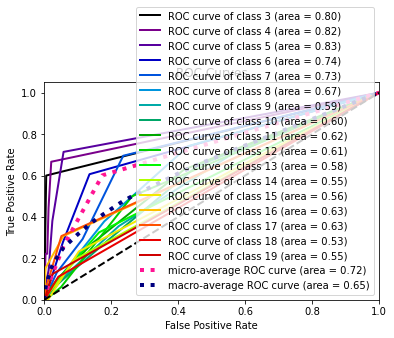

In [46]:
probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

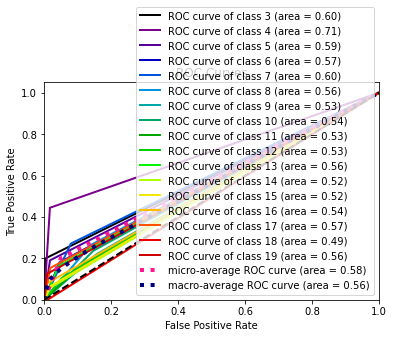

In [47]:
probas=dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

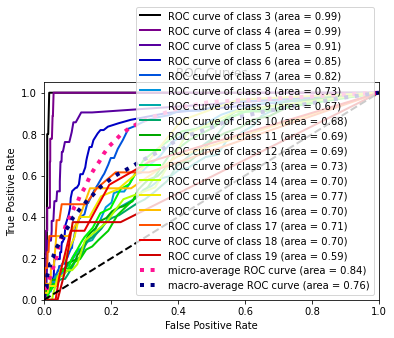

In [48]:
probas=rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

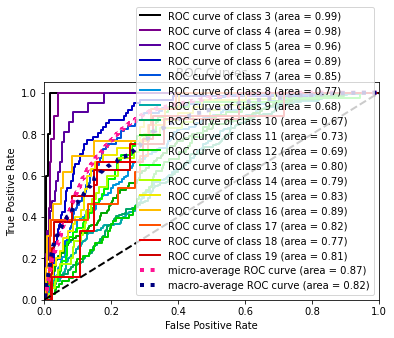

In [49]:
probas=svm.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

In [53]:
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score of KNN: ',scr.mean()*100)
print('Difference between CV_score and acc of KNN: ',(knn_te_report-scr.mean()*100))
scr=cross_val_score(dt,x,y,cv=5)
print('Cross validation score of DTC: ',scr.mean()*100)
print('Difference between CV_score and acc of DTC: ',(dtc_te_report-scr.mean()*100))
scr=cross_val_score(rf,x,y,cv=5)
print('Cross validation score of RFC: ',scr.mean()*100)
print('Difference between CV_score and acc of rfc: ',(rfc_te_report-scr.mean()*100))
scr=cross_val_score(svm,x,y,cv=5)
print('Cross validation score of SVM: ',scr.mean()*100)
print('Difference between CV_score and acc of svm: ',(svm_te_report-scr.mean()*100))

Cross validation score of KNN:  21.927222847278948
Difference between CV_score and acc of KNN:  -1.669030195839028
Cross validation score of DTC:  20.41295871029391
Difference between CV_score and acc of DTC:  -0.25407092479242266
Cross validation score of RFC:  24.857913475024272
Difference between CV_score and acc of rfc:  0.26621760739876876
Cross validation score of SVM:  26.993172325570647
Difference between CV_score and acc of svm:  -2.166955840962899


Difference is least for decision tree

In [68]:
#HPT
grid_param={'criterion':['gini','entropy'],
            'max_depth':range(12,24,3),
            'min_samples_leaf':range(22,40,2),
            'min_samples_split':range(10,50,2)}

In [71]:
grid_search=GridSearchCV(dt,param_grid=grid_param,cv=5,n_jobs=-1,verbose = 2)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3952 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 6963 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:    4.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(12, 24, 3),
                         'min_samples_leaf': range(22, 40, 2),
                         'min_samples_split': range(10, 50, 2)},
             verbose=2)

In [72]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 38,
 'min_samples_split': 10}

In [73]:
dt=DecisionTreeClassifier(criterion='gini', max_depth=12, min_samples_leaf=38, min_samples_split=10)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [74]:
accuracy_score(y_test,y_pred)*100

23.733862959285005

- Improved from 20.158887785501488 to 23.733862959285005 => 3.574% accuracy increase

In [77]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,accuracy,macro avg,weighted avg
precision,0.0,0.260870,0.217391,0.285714,0.271605,0.242604,0.232824,0.243243,0.221239,0.090909,0.187500,0.166667,0.0,0.200000,0.0,0.0,0.0,0.237339,0.154151,0.212116
recall,0.0,0.666667,0.238095,0.229508,0.239130,0.310606,0.344633,0.319527,0.201613,0.015152,0.139535,0.057143,0.0,0.153846,0.0,0.0,0.0,0.237339,0.171497,0.237339
f1-score,0.0,0.375000,0.227273,0.254545,0.254335,0.272425,0.277904,0.276215,0.210970,0.025974,0.160000,0.085106,0.0,0.173913,0.0,0.0,0.0,0.237339,0.152568,0.217376
support,5.0,9.000000,21.000000,61.000000,92.000000,132.000000,177.000000,169.000000,124.000000,66.000000,43.000000,35.000000,30.0,13.000000,13.0,9.0,8.0,0.237339,1007.000000,1007.000000


In [79]:
#Model Saving
filename='abalone.pkl'
pickle.dump(dt,open(filename,'wb'))